In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('IOT-temp.csv')
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [4]:
pd.value_counts(df["room_id/id"].unique())


Room Admin    1
dtype: int64

In [5]:
df.drop(["room_id/id"], axis = 1, inplace = True) 
df.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In


In [6]:
df['noted_date']=pd.to_datetime(df['noted_date'])
df_new=df.set_index('noted_date')
df_new.head()

,id,temp,out/in
noted_date,,,
2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,29,In
2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,29,In
2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,41,Out
2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,41,Out
2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,31,In


In [7]:
sum=df.groupby(df['out/in']).count()['id'].iloc[0]+df.groupby(df['out/in']).count()['id'].iloc[1]

print(" sensor'In' is {0} % and sensor'Out' is {1} % of total".format(round(df.groupby(df['out/in']).count()['id'].iloc[0]/sum*100),
    round(df.groupby(df['out/in']).count()['id'].iloc[1]/sum*100)))

 sensor'In' is 21 % and sensor'Out' is 79 % of total


In [8]:
df_new1=df_new.groupby(df_new.index).mean()
df_new2=df_new.groupby([df_new.index,"out/in"]).mean()

C:\Users\anees\AppData\Local\Temp\ipykernel_18320\1003859164.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new1=df_new.groupby(df_new.index).mean()
C:\Users\anees\AppData\Local\Temp\ipykernel_18320\1003859164.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new2=df_new.groupby([df_new.index,"out/in"]).mean()


<Axes: xlabel='noted_date'>

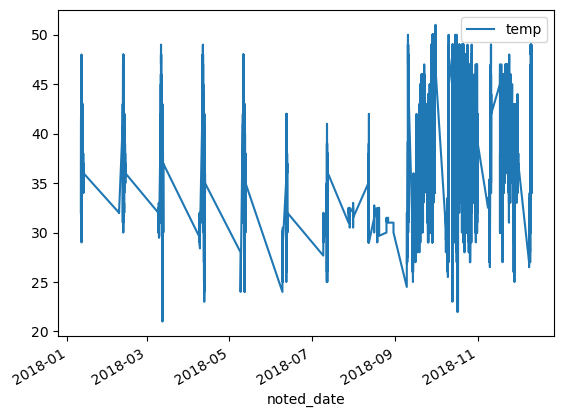

In [9]:
df_new1.plot()

In [10]:
pd.value_counts(df['noted_date'])

2018-12-09 03:09:00    65
2018-09-09 16:24:00    62
2018-09-09 17:31:00    53
2018-11-09 19:42:00    50
2018-09-09 16:08:00    50
                       ..
2018-11-22 21:23:00     1
2018-11-22 21:21:00     1
2018-10-21 05:41:00     1
2018-10-21 05:45:00     1
2018-10-21 21:54:00     1
Name: noted_date, Length: 27920, dtype: int64

In [11]:
df_new_in=df_new[df_new["out/in"]=="In"].groupby(["noted_date"]).mean()
df_new_out=df_new[df_new["out/in"]=="Out"].groupby(["noted_date"]).mean()


C:\Users\anees\AppData\Local\Temp\ipykernel_18320\952394308.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new_in=df_new[df_new["out/in"]=="In"].groupby(["noted_date"]).mean()
C:\Users\anees\AppData\Local\Temp\ipykernel_18320\952394308.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new_out=df_new[df_new["out/in"]=="Out"].groupby(["noted_date"]).mean()


Text(0, 0.5, 'temperature')

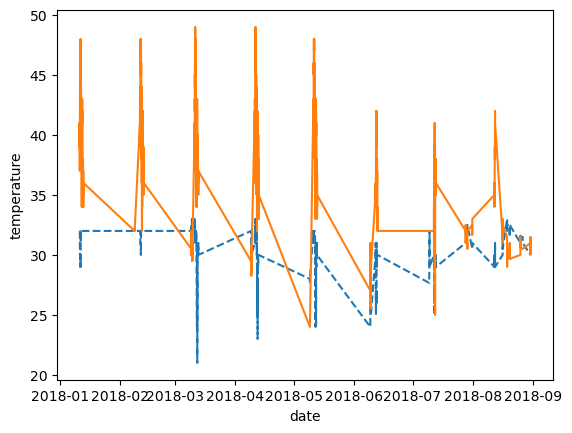

In [12]:
plt.plot(df_new_in.loc[:'2018-9-09 03:09:00'], '--')
plt.plot(df_new_out.loc[:'2018-9-09 03:09:00'], '-')
plt.xlabel('date')
plt.ylabel('temperature')

In [13]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest
df_new1
df_new1_mm = minmax_scale(df_new1)
scaler = StandardScaler()
df_new1_ss = scaler.fit_transform(df_new1)
print(df_new1_mm,'\n****************\n',df_new1_ss)

[[0.36666667]
 [0.63333333]
 [0.6       ]
 ...
 [0.76666667]
 [0.8       ]
 [0.76666667]] 
****************
 [[-0.91087583]
 [ 0.40151385]
 [ 0.23746514]
 ...
 [ 1.05770869]
 [ 1.2217574 ]
 [ 1.05770869]]


In [14]:
_, p = normaltest(df_new1_ss.squeeze())
print(f"significance: {p:.2f}")
_, p = normaltest(df_new1_mm.squeeze())
print(f"significance: {p:.2f}")

significance: 0.00
significance: 0.00


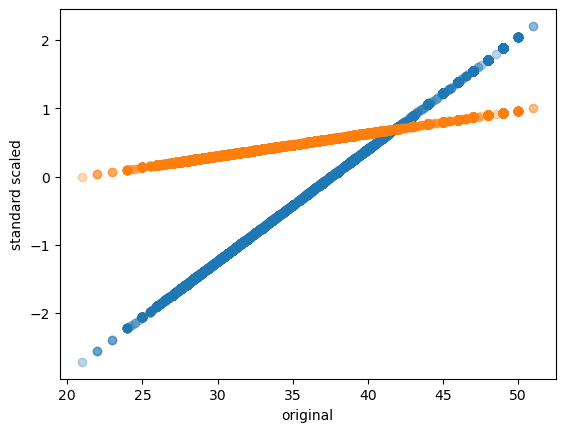

In [15]:
plt.scatter(df_new1, df_new1_ss, alpha=0.3)
plt.scatter(df_new1, df_new1_mm, alpha=0.3)

plt.ylabel("standard scaled")
plt.xlabel("original");

Text(0, 0.5, 'temperature')

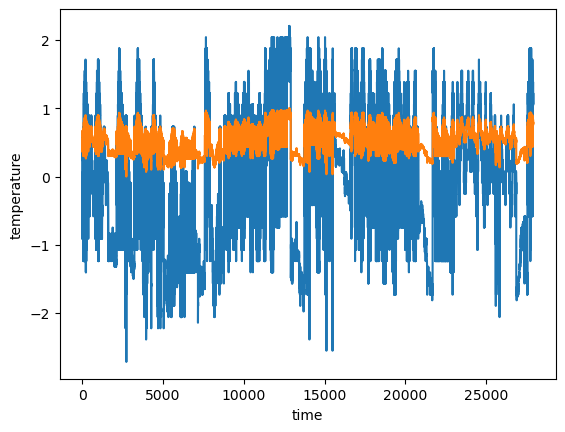

In [16]:
plt.plot(df_new1_ss)
plt.plot(df_new1_mm)
plt.xlabel('time')
plt.ylabel('temperature')

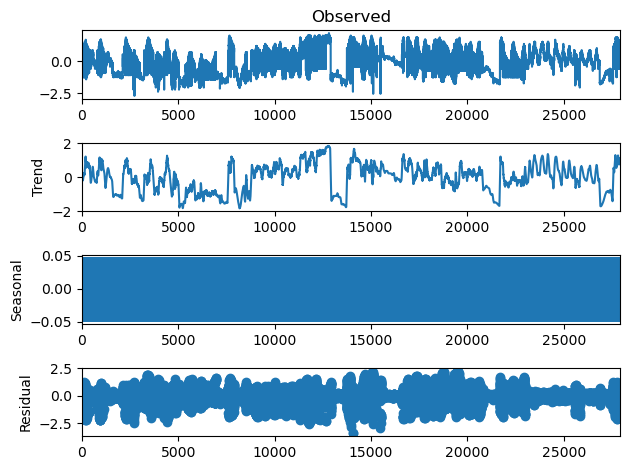

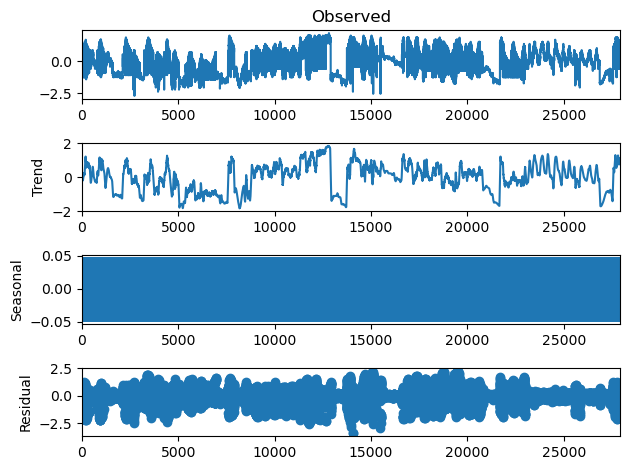

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_new1_ss, model='additive', period=52)
result.plot()

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h=sm.tsa.arima.ARIMA(endog=df_new1_ss,order=(1,1,3))
model=h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                27920
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -25921.069
Date:                Sun, 16 Apr 2023   AIC                          51852.139
Time:                        19:28:36   BIC                          51893.324
Sample:                             0   HQIC                         51865.399
                              - 27920                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1023      0.039     -2.629      0.009      -0.179      -0.026
ma.L1         -0.7370      0.039    -18.977      0.000      -0.813      -0.661
ma.L2         -0.0264      0.033     -0.802      0.423      -0.091       0.038
ma.L3         -0.0933      0.004    -26.359      0.000      -0.100      -0.086
sigma2         0.3749      0.002    171.190      0.000       0.371       0.379
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9831.96
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

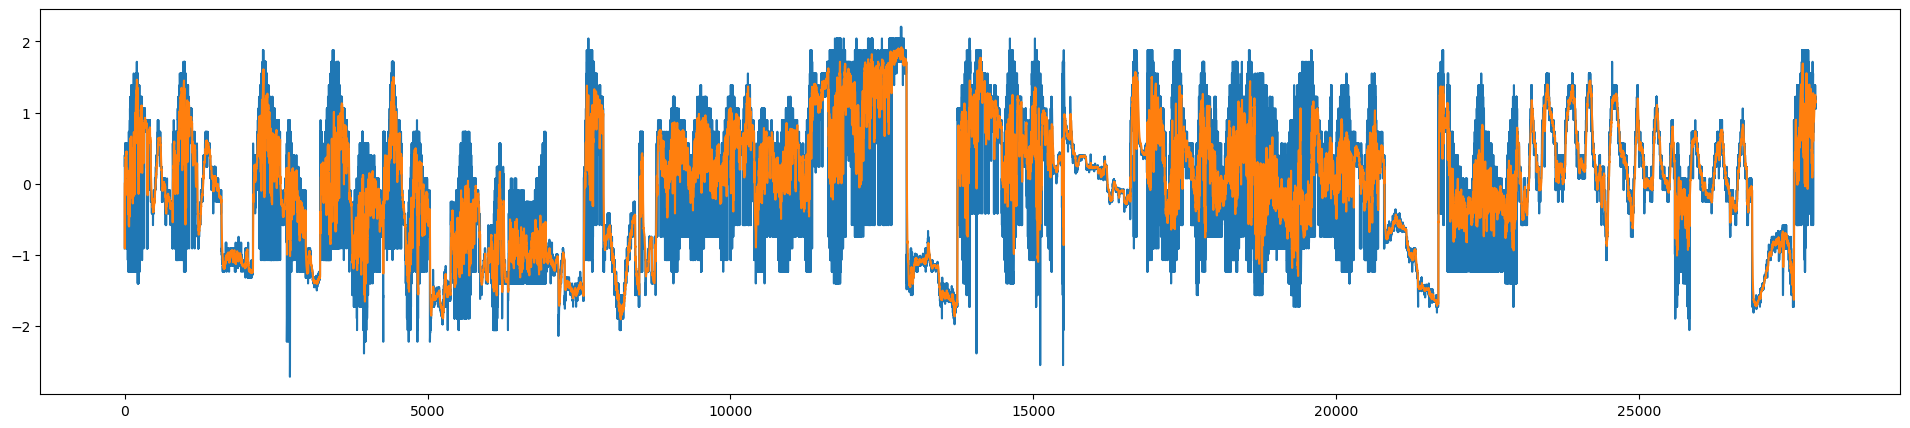

In [19]:
plt.figure(figsize=(24,5))
plt.plot(df_new1_ss)
plt.plot(model.predict())
plt.show()